<a href="https://colab.research.google.com/github/shobhitsundriyal/U-introDL_pytorch/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

n_pts = 100
centers = [[-0.5, 0.5], [0.5, 0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=1, centers=centers, cluster_std=0.4)

print(X)
print(y)

[[-0.7112687   0.07081255]
 [ 0.45582119  0.25305517]
 [ 0.70823053  0.04226344]
 [ 0.42763188  0.25843175]
 [ 1.37627989 -0.25854437]
 [ 0.81712275  0.25058771]
 [ 0.3935126   0.51304582]
 [-0.45127149  0.95179356]
 [-0.4831145   0.73312609]
 [ 0.59951966  0.38134354]
 [ 0.96413543  0.64779709]
 [-0.57673422  0.14494841]
 [ 0.50696376  0.05119251]
 [ 0.5174676   0.4094743 ]
 [ 0.37423016 -0.05859853]
 [ 0.59299782  0.77302056]
 [-0.7766643   0.34129859]
 [ 0.70127393  1.01729035]
 [ 0.82074441  0.51862692]
 [-0.0090235   0.62541909]
 [ 0.69808453  0.43011874]
 [-0.29482807  0.38076287]
 [ 0.19792471  0.19551724]
 [ 0.71178613  0.55508048]
 [ 0.53112845  0.7473521 ]
 [-0.62248161  0.83118986]
 [-0.45193642  0.74688124]
 [-0.37238436  0.40025185]
 [ 0.00797675  0.720215  ]
 [-0.54915609  0.12569223]
 [-0.37993187  0.35910006]
 [-0.04924693  0.62606376]
 [ 0.16392087  0.79681766]
 [ 0.64021839 -0.02491336]
 [-0.02043285  0.57406257]
 [ 0.83846426  0.15619362]
 [ 0.79622258  0.11851976]
 

In [3]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))
print(y.shape)
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

(100,)


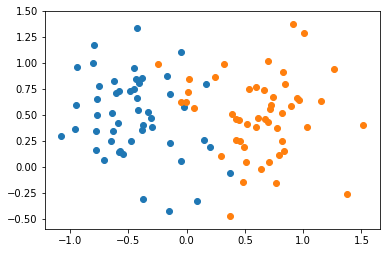

In [4]:
scatter_plot()

In [0]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

In [0]:
import torch.nn as nn

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self, X):
    pred = torch.sigmoid(self.linear(X))
    return pred
  
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [18]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2, 2])
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.show()

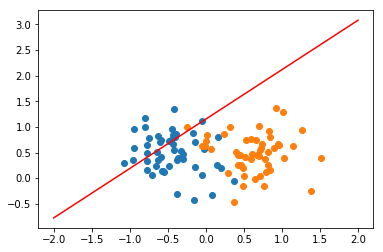

In [21]:
plot_fit('Inital Model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [23]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.653724730014801
epoch: 1 loss: 0.6530995965003967
epoch: 2 loss: 0.6524759531021118
epoch: 3 loss: 0.6518535614013672
epoch: 4 loss: 0.6512323617935181
epoch: 5 loss: 0.6506123542785645
epoch: 6 loss: 0.6499935388565063
epoch: 7 loss: 0.6493759155273438
epoch: 8 loss: 0.6487594842910767
epoch: 9 loss: 0.648144543170929
epoch: 10 loss: 0.6475307941436768
epoch: 11 loss: 0.6469179391860962
epoch: 12 loss: 0.6463066935539246
epoch: 13 loss: 0.6456962823867798
epoch: 14 loss: 0.6450873017311096
epoch: 15 loss: 0.6444793939590454
epoch: 16 loss: 0.6438729166984558
epoch: 17 loss: 0.6432674527168274
epoch: 18 loss: 0.6426633596420288
epoch: 19 loss: 0.6420603394508362
epoch: 20 loss: 0.6414584517478943
epoch: 21 loss: 0.6408576965332031
epoch: 22 loss: 0.640258252620697
epoch: 23 loss: 0.6396600604057312
epoch: 24 loss: 0.6390628218650818
epoch: 25 loss: 0.6384668946266174
epoch: 26 loss: 0.6378722786903381
epoch: 27 loss: 0.63727867603302
epoch: 28 loss: 0.6366865038871765


Text(0, 0.5, 'Loss')

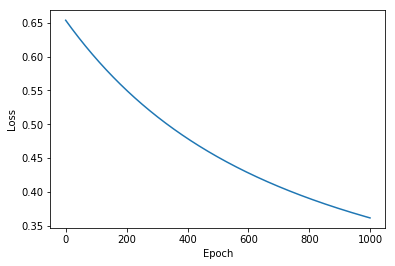

In [24]:
plt.plot(range(epoch), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')